In [19]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

img_path = 'colorpic.jpg'
img = cv2.imread(img_path)



#считываем csv файл и даем каждым значениям rgb свой цвет
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)






In [20]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

In [21]:
mg = cv2.imread("girl_grass.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dim = (700, 500)
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)




In [22]:
from sklearn.cluster import KMeans

In [23]:
clt = KMeans(n_clusters=5)
clt.fit(img.reshape(-1,3))


KMeans(n_clusters=5)

In [24]:
a=clt.cluster_centers_

In [25]:
for i,j,x in a: #алгоритм выыодит названия самых частых цветов!!!!!
    print(get_color_name(i,j,x))
    

Trolley Grey
Dark Pastel Red
Pale Silver
Onyx
Celestial Blue


In [26]:
# функция для нахождения самого близкого цвета
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname


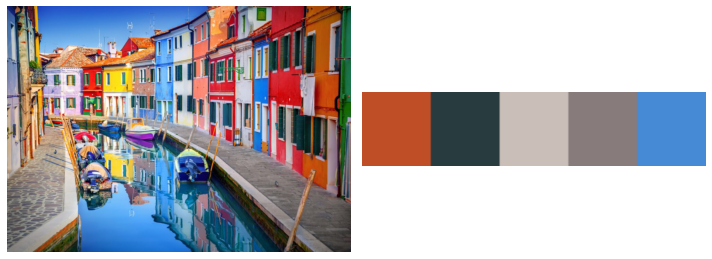

In [27]:
def palette(clusters):
    width=140
    palette = np.zeros((30, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

  
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette(clt_1))

